In [1]:
from sympy import *
import numpy as np
import math

Checking Some Derivatives

In [2]:
xb, l, Omega, w = symbols ('xb l Omega w', real=True, nonzero=True)


In [3]:
x = diff ((Omega * (xb * exp(-abs(l)))**(3 * (1 + w)) * (1 -(exp(-abs(l)))**(3 * (1 - w))))**(-1/2), l,2)
print(x)



(2.25*(xb*exp(-Abs(l)))**(-6*w - 6)*(xb*exp(-Abs(l)))**(6*w + 6)*((w - 1)*exp(3*(w - 1)*Abs(l)) - (w + 1)*(exp(3*(w - 1)*Abs(l)) - 1))**2/(exp(3*(w - 1)*Abs(l)) - 1) + 4.5*(xb*exp(-Abs(l)))**(-3*w - 3)*(xb*exp(-Abs(l)))**(3*w + 3)*(w - 1)*((w - 1)*exp(3*(w - 1)*Abs(l)) - (w + 1)*(exp(3*(w - 1)*Abs(l)) - 1))*exp(3*(w - 1)*Abs(l))/(exp(3*(w - 1)*Abs(l)) - 1) - 4.5*(xb*exp(-Abs(l)))**(-3*w - 3)*(xb*exp(-Abs(l)))**(3*w + 3)*(w + 1)*((w - 1)*exp(3*(w - 1)*Abs(l)) - (w + 1)*(exp(3*(w - 1)*Abs(l)) - 1)) - (xb*exp(-Abs(l)))**(-3*w - 3)*(xb*exp(-Abs(l)))**(3*w + 3)*(4.5*(w - 1)**2*exp(3*(w - 1)*Abs(l)) - 9.0*(w - 1)*(w + 1)*exp(3*(w - 1)*Abs(l)) + 4.5*(w + 1)**2*(exp(3*(w - 1)*Abs(l)) - 1)))/((-Omega*(xb*exp(-Abs(l)))**(3*w + 3)*(exp(3*(w - 1)*Abs(l)) - 1))**0.5*(exp(3*(w - 1)*Abs(l)) - 1))


In [4]:
xb = 1.0*10**25
w = 0.33
Omega = 0.3
l = -43


In [5]:
N = 1 / (Omega * (xb * math.exp(-abs(l)))**(3 * (1 + w)) * (1 -(math.exp(-abs(l)))**(3 * (1 - w))))**(1/2)
dndtau = ((xb*math.exp(-abs(l)))**(-3*w - 3)*(0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l)))*(3*w + 3)*l+ 0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(3*w - 3)*math.exp(-(3 - 3*w)*abs(l))*l))/(Omega*(Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l))))**0.5*(1 - math.exp(-(3 - 3*w)*abs(l))))
num = (xb*math.exp(-abs(l)))**(-3*w - 3)*(0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l)))*(3*w + 3)*l+ 0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(3*w - 3)*math.exp(-(3 - 3*w)*abs(l))*l)
dndtau2 = (2.25*(xb*math.exp(-abs(l)))**(-6*w - 6)*(xb*math.exp(-abs(l)))**(6*w + 6)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1))**2/(math.exp(3*(w - 1)*abs(l)) - 1) + 4.5*(xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(w - 1)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1))*math.exp(3*(w - 1)*abs(l))/(math.exp(3*(w - 1)*abs(l)) - 1) - 4.5*(xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(w + 1)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1)) - (xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(4.5*(w - 1)**2*math.exp(3*(w - 1)*abs(l)) - 9.0*(w - 1)*(w + 1)*math.exp(3*(w - 1)*abs(l)) + 4.5*(w + 1)**2*(math.exp(3*(w - 1)*abs(l)) - 1)))/((-Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(math.exp(3*(w - 1)*abs(l)) - 1))**0.5*(math.exp(3*(w - 1)*abs(l)) - 1))
x = xb * math.exp(- abs(l))
print(0.7 / (N * x**3), N)

1.6853678412317268e-07 4.3892619753842213e-13


In [6]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
%matplotlib inline

In [7]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [8]:
lp_RH= 1.0 / (Ncm.C.hubble_radius_hm1_planck () / 0.7)

In [9]:
cosmo = Nc.HICosmo.new_from_name(Nc.HICosmo, "NcHICosmoSFB")
csq1d = Nc.HIPertAdiab.new ()

ki    = 1.0e1
kf    = 1.0e9
k_a   = np.geomspace (ki, kf, 5)
csq1d.set_k (kf)
(Found2, etafa) = csq1d.find_adiab_time_limit (cosmo, t0=20.0, t1=100.0, reltol=1.0e1)

print (f"{Found2}, {etafa}")

csq1d.set_k (ki)
(Found1, etaia) = csq1d.find_adiab_time_limit (cosmo, t0=-100.0, t1=20.0, reltol=1.0e1)

print (f"{Found1}, {etaia}")


True, 47.6735369275918
True, -56.928760961214394


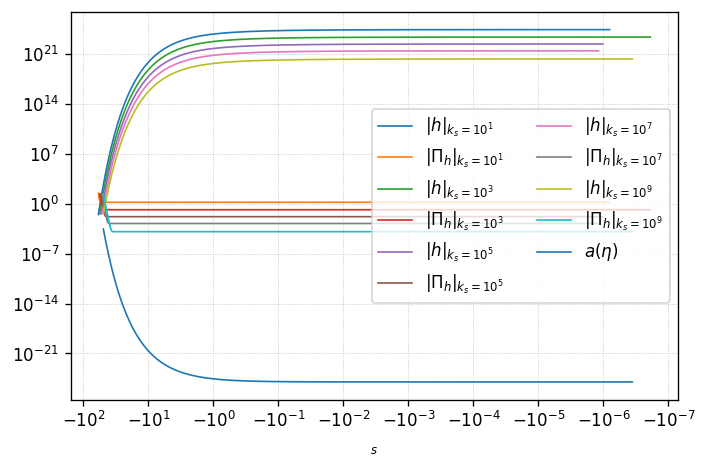

In [10]:
fig = plt.figure (dpi = 120)
max_etaf = 200.0
min_etai = -200.0

for k in k_a:
  csq1d.set_k (k)
  csq1d.set_reltol (1.0e-5)

  (Found1, etai)  = csq1d.find_adiab_time_limit (cosmo, -100.0, 20.0, 1.0e-5)
  (Found2, etafa) = csq1d.find_adiab_time_limit (cosmo, -100.0, 100.0, 1.0e-1)
  etaf = etafa * 10
  csq1d.set_ti (etai)
  csq1d.set_init_cond_adiab (cosmo, etai)
  csq1d.prepare(cosmo)
  min_etai = min (etai, min_etai)
  max_etaf = max (etaf, max_etaf)
#Check if the derivatives are right with sympy and then check why is init_cond_adiab crashing for some momentum. Find a   
  eta_a, eta_s = csq1d.get_time_array ()
     
  y_a          = []
  Abs_phi2_a   = []
  Abs_Pphi2_a  = []
  myt = []

  eta_a = np.array (eta_a)
  for eta in eta_a:
    (J11, J12, J22) = csq1d.get_J_at (cosmo, eta)
    if eta <= 0.0:
      Abs_phi2_a.append (J11)
      Abs_Pphi2_a.append (J22)
      myt.append(eta)
    else:
      pass
  y_a         = np.array (y_a)
  Abs_phi2_a  = np.array (Abs_phi2_a)
  Abs_Pphi2_a = np.array (Abs_Pphi2_a)

  mylw    = 1

  plt.plot (myt, np.sqrt (Abs_phi2_a), lw=mylw, label = r'$\vert h\vert_{k_s = 10^{%0.2g}}$' % math.log10 (k))
  plt.plot (myt, np.sqrt (Abs_Pphi2_a), lw=mylw, label = r'$\vert\Pi_h\vert_{k_s = 10^{%0.2g}}$' % math.log10 (k))

etac_a = np.geomspace (min_etai, -eta_s, 1000)
etae_a = np.geomspace (eta_s, max_etaf, 1000)
eta_a  = np.concatenate ((etac_a, etae_a))
a_a    = np.array ([10**(-25)*math.exp(abs(eta)) for eta in myt])
a_b    = min (a_a)

plt.plot (myt, a_a, lw=mylw, label = r'$a(\eta)$')

plt.grid (b=True, which='both', linestyle=':', color='0.75', linewidth=0.5)
leg = plt.legend (loc="best", ncol = 2)
plt.xscale('symlog', linthresh = 1.0e-30, linscale = 4.0)
plt.yscale('log')
plt.xlabel ("$\t_s$")
fig.tight_layout ()



plt.show ()

